In [5]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

src_path = r"F:\Work\SOCAAutomation\Dataset\Converted"
dst_path = r"F:\Work\SOCAAutomation\Dataset\Images\SplitVideos"
excel = pd.read_excel(r"F:\Work\SOCAAutomation\Dataset\DatasetAnalysisReport.xlsx", sheet_name = 'Video Extraction')

output_folder = "Frames"
os.makedirs(output_folder, exist_ok=True)

In [6]:
excel_group = pd.DataFrame()
excel_group['Start Time'] = excel.groupby(['Folder', 'Video File'])['Start Time'].apply(list)
excel_group['End Time'] = excel.groupby(['Folder', 'Video File'])['End Time'].apply(list)
excel_group.reset_index(inplace = True)
excel_group.head()

,Folder,Video File,Start Time,End Time
0,04_07_2024,AXIS 213 - 10.1.5.173 2024-07-04_11_51_08_772,"[02;51, 02;56, 03;12, 03;19, 03;35, 03;42, 03;...","[02;53, 02;59, 03;14, 03;21, 03;37, 03;43, 03;..."
1,09_07_2024,AXIS 213 - 10.1.5.173 2024-07-09_11_30_00_000,"[02;16, 02;19, 02;23, 03;00, 03;04, 03;26, 03;...","[02;18, 02;21, 02;25, 03;03, 03;06, 03;28, 03;..."
2,09_07_2024,AXIS 213 - 10.1.5.173 2024-07-09_14_44_00_000,"[00;24, 00;41]","[00;31, 00;43]"
3,14_08_2024,AXIS 213 - 10.1.5.173 2024-08-14_15_34_48_759,"[08;30, 13;12, 13;22, 13;26, 13;52]","[09;56, 13;14, 13;24, 13;50, 14;18]"
4,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,"[04;48, 04;53, 05;05, 05;12, 05;15, 06;19, 06;...","[04;51, 04;54, 05;05, 05;14, 05;17, 06;21, 06;..."


In [7]:
excel_group

,Folder,Video File,Start Time,End Time
0,04_07_2024,AXIS 213 - 10.1.5.173 2024-07-04_11_51_08_772,"[02;51, 02;56, 03;12, 03;19, 03;35, 03;42, 03;...","[02;53, 02;59, 03;14, 03;21, 03;37, 03;43, 03;..."
1,09_07_2024,AXIS 213 - 10.1.5.173 2024-07-09_11_30_00_000,"[02;16, 02;19, 02;23, 03;00, 03;04, 03;26, 03;...","[02;18, 02;21, 02;25, 03;03, 03;06, 03;28, 03;..."
2,09_07_2024,AXIS 213 - 10.1.5.173 2024-07-09_14_44_00_000,"[00;24, 00;41]","[00;31, 00;43]"
3,14_08_2024,AXIS 213 - 10.1.5.173 2024-08-14_15_34_48_759,"[08;30, 13;12, 13;22, 13;26, 13;52]","[09;56, 13;14, 13;24, 13;50, 14;18]"
4,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,"[04;48, 04;53, 05;05, 05;12, 05;15, 06;19, 06;...","[04;51, 04;54, 05;05, 05;14, 05;17, 06;21, 06;..."
5,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_13_40_00_000,"[3;26, 3;29, 3;30, 3;32, 3;35, 3;48, 4;08, 4;1...","[3;28, 3;31, 3;32, 3;34, 3;37, 3;50, 4;15, 4;1..."
6,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_15_45_00_000,"[9;08, 9;12, 9;15, 9;23]","[9;10, 9;14, 9;17, 9;24]"


In [11]:
fps = 30
for i in range(len(excel_group)):
    file_path = src_path + "/" + excel_group.loc[i, 'Folder'] + "/" + excel_group.loc[i, 'Video File'] + ".mp4"
    folder = dst_path + "/" + excel_group.loc[i, 'Video File'].split()[-1]
#     if folder == dst_path + "/" + '2024-08-22_10_40_00_000':
#         print(f"Folder {folder} is skipped")
#         continue
    cap = cv2.VideoCapture(file_path)
    segment = 1
    start_time_list = list(excel_group.loc[i, 'Start Time'])
    end_time_list = list(excel_group.loc[i, 'End Time'])
    for j in range(len(start_time_list)):
        
        start_time = start_time_list[j]
        end_time = end_time_list[j]
        
        print(f"Starting Segment {segment} => {start_time} to {end_time}")
        output_folder = folder +  "/" + str(segment)
        os.makedirs(output_folder, exist_ok=True)
    
        start_min = int(start_time.split(";")[0])
        start_sec = int(start_time.split(";")[1])
        start_sec = start_min * 60 + start_sec

        end_min = int(end_time.split(";")[0])
        end_sec = int(end_time.split(";")[1]) + 1
        end_sec = end_min * 60 + end_sec

        start_frame = int(start_sec * fps)
        end_frame   = int(end_sec * fps)

        frame_no = start_frame
        cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)
        
        print(f"Start Frame: {start_frame}, End Frame: {end_frame}")
        while frame_no <= end_frame:
            ret, frame = cap.read()
            if not ret:
                break

            filename = os.path.join(output_folder, f"frame_{frame_no:06d}.jpg")
            cv2.imwrite(filename, frame)

            frame_no += 1
        segment += 1

    cap.release()


Starting Segment 1 => 02;51 to 02;53
Start Frame: 5130, End Frame: 5220
Starting Segment 2 => 02;56 to 02;59
Start Frame: 5280, End Frame: 5400
Starting Segment 3 => 03;12 to 03;14
Start Frame: 5760, End Frame: 5850
Starting Segment 4 => 03;19 to 03;21
Start Frame: 5970, End Frame: 6060
Starting Segment 5 => 03;35 to 03;37
Start Frame: 6450, End Frame: 6540
Starting Segment 6 => 03;42 to 03;43
Start Frame: 6660, End Frame: 6720
Starting Segment 7 => 03;53 to 03;55
Start Frame: 6990, End Frame: 7080
Starting Segment 8 => 04;14 to 04;16
Start Frame: 7620, End Frame: 7710
Starting Segment 9 => 05;01 to 05;03
Start Frame: 9030, End Frame: 9120
Starting Segment 10 => 07;30 to 07;32
Start Frame: 13500, End Frame: 13590
Starting Segment 1 => 02;16 to 02;18
Start Frame: 4080, End Frame: 4170
Starting Segment 2 => 02;19 to 02;21
Start Frame: 4170, End Frame: 4260
Starting Segment 3 => 02;23 to 02;25
Start Frame: 4290, End Frame: 4380
Starting Segment 4 => 03;00 to 03;03
Start Frame: 5400, End F

In [10]:
list(excel_group.loc[i, 'Start Time'])

['02;51',
 '02;56',
 '03;12',
 '03;19',
 '03;35',
 '03;42',
 '03;53',
 '04;14',
 '05;01',
 '07;30']

# Extract Minor Segments

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt

src_path = r"F:\Work\SOCAAutomation\Dataset\Images\SplitVideos"
dst_path = r"F:\Work\SOCAAutomation\Dataset\Images\SplitVideosMinorSegments"


# output_folder = "Frames"
# os.makedirs(output_folder, exist_ok=True)

In [31]:
excel = pd.read_excel(r"F:\Work\SOCAAutomation\Dataset\DatasetAnalysisReport.xlsx", sheet_name = 'Video Extraction')
excel.head()

,Folder,Video File,File Path,Sub Segment,Start Time,End Time,No of Frames,Start Frame,End Frame,Sputtering,Out of Focus,Visibility,Misc,Temp,Folders,Image Selection
0,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,1,04;48,04;51,3.0,74,77,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,2,04;53,04;54,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
2,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,3,05;05,05;05,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
3,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,4,05;12,05;14,16.0,31,48,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,5,05;15,05;17,10.0,30,40,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data = excel[(excel['Sputtering'] == 'Yes') | (excel['Sputtering'] == 'yes')]
data.head()

,Folder,Video File,File Path,Sub Segment,Start Time,End Time,No of Frames,Start Frame,End Frame,Sputtering,Out of Focus,Visibility,Misc,Temp,Folders,Image Selection
0,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,1,04;48,04;51,3.0,74,77,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,4,05;12,05;14,16.0,31,48,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,5,05;15,05;17,10.0,30,40,Yes,NaN,NaN,NaN,NaN,NaN,NaN
5,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,6,06;19,06;21,10.0,38,48,Yes,NaN,NaN,NaN,NaN,NaN,NaN
6,22_08_2024,AXIS 213 - 10.1.5.173 2024-08-22_10_40_00_000,2024-08-22_10_40_00_000,7,06;25,06;27,8.0,26,34,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
data['Start Frame'] = data['Start Frame'].apply(str2numlist)
data['End Frame'] = data['End Frame'].apply(str2numlist)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12264\3509473737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Start Frame'] = data['Start Frame'].apply(str2numlist)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12264\3509473737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['End Frame'] = data['End Frame'].apply(str2numlist)


In [5]:
def str2numlist(x):
    if not type(x) is int:
        temp = x.split(",")
        temp = [int(ele.strip()) for ele in temp]
        return temp
    else:
        return [x]

In [41]:
for i in range(len(data)):
    src_full_path = src_path + "/" + data['File Path'].iloc[i] + "/" + str(data['Sub Segment'].iloc[i])
    dst_full_path = dst_path + "/" + data['File Path'].iloc[i] + "_" + str(data['Sub Segment'].iloc[i])
    files = os.listdir(src_full_path)
    
    start_list = data['Start Frame'].iloc[i]
    end_list = data['End Frame'].iloc[i]
    sub_seg = 1
    for start_idx in range(len(start_list)):
        start_val = start_list[start_idx]
        end_val = end_list[start_idx]
        dur = end_val - start_val + 1
        if dur < 5:
            print(f"Initial: {start_val}, {end_val}")
            end_val_diff = (5 - dur) // 2
            start_val_diff = 5 - dur - end_val_diff
            start_val -= start_val_diff
            end_val += end_val_diff            
            print(f"Final: {start_val}, {end_val}")
            
        for file_index in np.arange(start_val-1, end_val):
            try:
                file = files[file_index]
                file_path = src_full_path + "/" + file
                os.makedirs(dst_full_path + "_" + str(sub_seg), exist_ok=True)
                shutil.copy2(file_path, dst_full_path + "_" + str(sub_seg))
            except:
                print(file_path)
        sub_seg += 1

Initial: 74, 77
Final: 73, 77
Initial: 2, 5
Final: 1, 5
Initial: 33, 35
Final: 32, 36
Initial: 73, 76
Final: 72, 76
Initial: 87, 89
Final: 86, 90
Initial: 3, 5
Final: 2, 6
Initial: 31, 34
Final: 30, 34
Initial: 59, 62
Final: 58, 62
Initial: 58, 61
Final: 57, 61
Initial: 34, 37
Final: 33, 37
Initial: 44, 47
Final: 43, 47
Initial: 38, 41
Final: 37, 41
Initial: 59, 62
Final: 58, 62
Initial: 16, 19
Final: 15, 19
Initial: 22, 25
Final: 21, 25
Initial: 46, 49
Final: 45, 49
Initial: 50, 52
Final: 49, 53
Initial: 55, 58
Final: 54, 58
Initial: 25, 27
Final: 24, 28
Initial: 20, 23
Final: 19, 23
Initial: 24, 27
Final: 23, 27
Initial: 55, 57
Final: 54, 58
Initial: 78, 80
Final: 77, 81
Initial: 2, 5
Final: 1, 5
Initial: 1407, 1410
Final: 1406, 1410
Initial: 1623, 1626
Final: 1622, 1626
Initial: 1665, 1668
Final: 1664, 1668
Initial: 1725, 1728
Final: 1724, 1728
Initial: 2485, 2487
Final: 2484, 2488
Initial: 172, 175
Final: 171, 175
Initial: 373, 376
Final: 372, 376
Initial: 462, 465
Final: 461, 465


In [38]:
start_frames = data[['Start Frame', 'End Frame']].apply(lambda x: [b-a+1 for a, b in zip(x['Start Frame'], x['End Frame'])], axis=1)

In [29]:
start_frames.loc[23]

KeyError: 23

In [30]:
start_frames

0                                                   [3]
3                                                  [17]
4                                                  [10]
5                                                  [10]
6                                                   [8]
                            ...                        
73    [3, 7, 4, 4, 5, 10, 4, 4, 13, 10, 8, 11, 4, 8,...
74                                                 [10]
75                                                  [6]
76    [9, 25, 38, 4, 20, 16, 3, 41, 25, 13, 17, 18, ...
77    [13, 10, 10, 5, 7, 8, 14, 2, 81, 42, 8, 26, 23...
Length: 69, dtype: object

In [39]:
frame_len = []
for ele in list(start_frames):
    frame_len.extend(ele)

In [40]:
test = pd.value_counts(frame_len).reset_index().sort_values('index')
test['cumsum'] = test[0].cumsum()
test['cumsum_ratio'] = test['cumsum']/test[0].sum()
test

,index,0,cumsum,cumsum_ratio
8,3,9,9,0.035573
1,4,26,35,0.138340
3,5,23,58,0.229249
5,6,21,79,0.312253
0,7,27,106,0.418972
2,8,26,132,0.521739
7,9,15,147,0.581028
6,10,16,163,0.644269
4,11,22,185,0.731225
11,12,8,193,0.762846


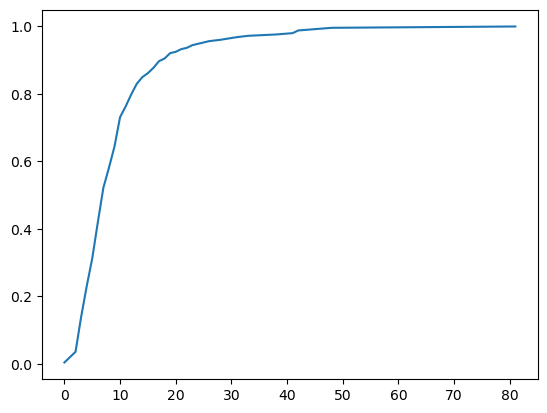

In [13]:
plt.plot(test['index'], test['cumsum']/253)

(array([35., 71., 57., 39., 20., 11.,  4.,  4.,  2.,  2.,  1.,  1.,  3.,
         1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  3.24,  6.48,  9.72, 12.96, 16.2 , 19.44, 22.68, 25.92,
        29.16, 32.4 , 35.64, 38.88, 42.12, 45.36, 48.6 , 51.84, 55.08,
        58.32, 61.56, 64.8 , 68.04, 71.28, 74.52, 77.76, 81.  ]),
 <BarContainer object of 25 artists>)

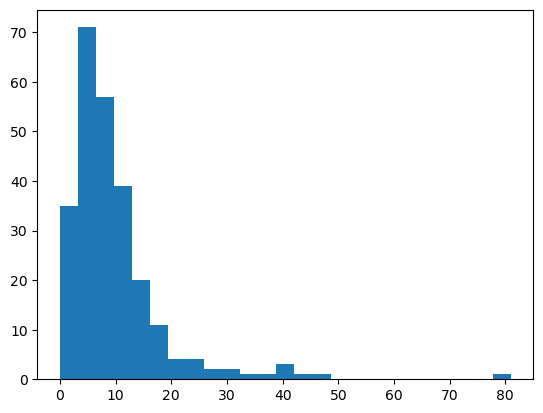

In [11]:

plt.hist(frame_len, bins = 25)

# Prepared by Muthu